# Multi-level Lead Brick Configuration

## Loading the MDF Objects

The calibration data MDF object.

In [7]:
from MuDataFrame import *

mdfo_calib = MuDataFrame("/Volumes/mac_extended/Research/MT/proto1b/data_sets/calibration_data/calibration_data_updated.csv")
mdf_calib = mdfo_calib.events_df
mdfo_calib.og_df = mdf_calib.copy()
#mdfo_calib.show()

The new config data MDF object.

In [6]:
from MuDataFrame import *
import copy
import glob

path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/multi_level_lead/*.csv"
lead_files = glob.glob(path)
"""
r1,r2 = 584, 592
path = "/Volumes/mac_extended/Research/MT/proto1b/data_sets/multi_level_lead/run{}.csv"
#path = "processed_data/run{}.csv"
lead_files = [path.format(i) for i in range(r1,r2+1)]
"""

mdfo_c = [] #collection of objects

for file in lead_files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

mdf_list = [i.events_df for i in mdfo_c]
mdf_lead = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_lead = copy.copy(mdfo_c[0])
mdfo_lead.events_df = mdf_lead

mdfo_lead.longDataMode()

mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead.copy()
mdfo_lead.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,z_angle,SmallCounter,speed,Run_Num,xx,yy,xx1,yy1,time_of_day,time
0,0,0,2021-04-16 13:31:06.823417,0,1.0,1.0,1.0,1.0,1.0,1.0,...,9.698015,NaN,0.859016,584,-11.688995,-29.003056,-12.276923,-27.938462,day,0
1,1,1,2021-04-16 13:31:07.112220,0,1.0,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,584,-11.146882,NaN,-11.200000,NaN,day,288803
2,2,2,2021-04-16 13:31:07.242037,0,1.0,1.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,584,NaN,NaN,NaN,NaN,day,418620
3,3,3,2021-04-16 13:31:07.492069,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.237844,NaN,0.794456,584,15.460397,-6.497405,15.761538,-5.915385,day,668652
4,4,4,2021-04-16 13:31:08.112115,0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.834476,NaN,2.771599,584,5.275796,-14.770635,6.484615,-15.438462,day,1288698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086893,99995,2086893,2021-04-27 05:19:39.682445,0,0.0,1.0,1.0,1.0,0.0,1.0,...,NaN,NaN,NaN,607,NaN,-13.810723,NaN,-14.146154,night,746780859028
2086894,99996,2086894,2021-04-27 05:19:39.822446,0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.869777,NaN,0.700545,607,-15.859408,4.294947,-15.976923,4.892308,night,746780999029
2086895,99997,2086895,2021-04-27 05:19:40.242500,0,1.0,1.0,1.0,1.0,1.0,1.0,...,13.149381,NaN,0.376800,607,-19.657475,0.702956,-19.307692,0.653846,night,746781419083
2086896,99998,2086896,2021-04-27 05:19:40.382459,0,1.0,1.0,1.0,1.0,1.0,1.0,...,10.954580,NaN,0.533901,607,-32.782805,-5.985158,-33.438462,-6.484615,night,746781559042


# Analyzing the effects of change of position of Bottom Plate

In [8]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

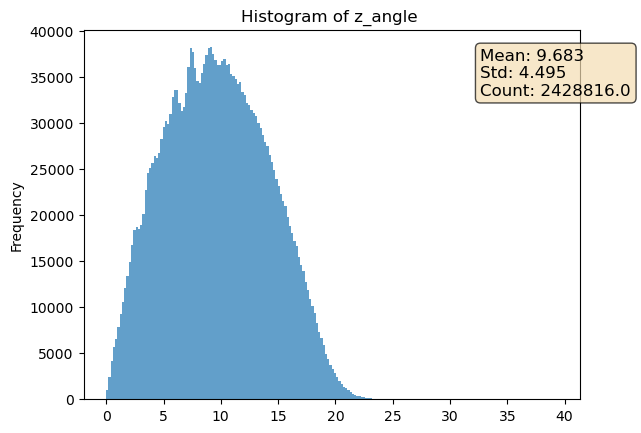

In [9]:
mdfo_calib.getHistogram("z_angle")

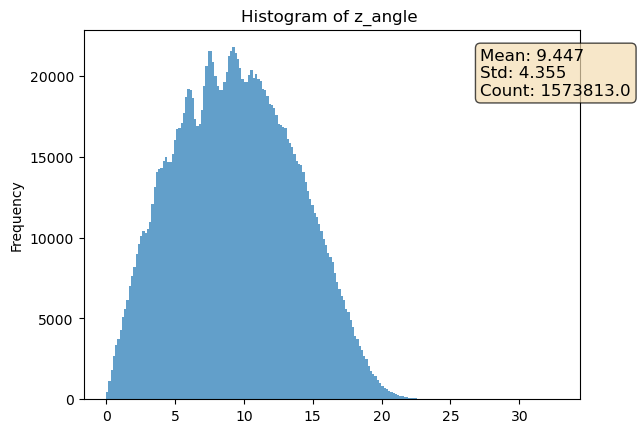

In [10]:
mdfo_lead.getHistogram("z_angle")

# Generating Tomograms

### Helper Functions

In [11]:
import copy

def getXatZPlane_diffTDC(x1, x2, zplane, dsep):
    x = (zplane / dsep) * (
        getPhysicalUnitsFromDiffTDC(x1) -
        getPhysicalUnitsFromDiffTDC(x2)) + getPhysicalUnitsFromDiffTDC(x1)
    return x

def getPhysicalUnitsFromDiffTDC(tdc):
    return (55 / 130) * tdc

def getSameShapeDataSets(mdfo1, mdfo2):
    mdfo1 =  copy.copy(mdfo1)
    mdfo2 = copy.copy(mdfo2)
    s1 = len(mdfo1.events_df.index)
    s2 = len(mdfo2.events_df.index)
    s = min(s1,s2)
    mdfo1.events_df =  mdfo1.events_df.iloc[:s]
    mdfo2.events_df =  mdfo2.events_df.iloc[:s]
    return mdfo1, mdfo2

def getSameSizeData(mdfo1, mdfo2, data_term):
    mdfo1, mdfo2 = getSameShapeDataSets(mdfo1, mdfo2)
    return mdfo1.get(data_term), mdfo2.get(data_term)

def getRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    h = h1 / h2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.show()


def getNormalizedRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("multi_level/tomogram_lead_tungsten_{}.png".format(title.strip()))
  #  plt.show()

    
def getNormalizedRatioPlotMatrix( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    return h.T
    
def getNormalizedRatioPlot_nonCenter( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("multi_level/tomogram_{}.png".format(title.strip()))
  #  plt.show()
    
    
def getNormalizedRatioPlot( xviews, yviews, axes=[-30,30], bins=(15,15),title="Data"):
    xx_lead, xx_calib = xviews
    yy_lead, yy_calib = yviews
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xx_lead, yy_lead, bins=bins, range=ranges)
    h2, xedges, yedges = np.histogram2d(xx_calib, yy_calib, bins=bins, range=ranges)
    normH1 = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
    normH2 = (1/(h2[int(np.floor(h2.shape[0]/2))][int(np.floor(h2.shape[1]/2))]))*h2
    h = normH1 / normH2
 #   h[h >= 1.15] = 1.15
 #   h[h <= 0.8] = 0.8
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, h.T)
    plt.title("Reco Z plane XY View Ratio ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.savefig("multi_level/tomogram_{}.png".format(title.strip()))
   # plt.show()
    
    
def getTomogramMatrix(xview, yview, axes=[-30,30], bins=(15,15),title="Data"):
    ranges = (axes,axes)
    h1, xedges, yedges = np.histogram2d(xview, yview, bins=bins, range=ranges)
    normH = (1/(h1[int(np.floor(h1.shape[0]/2))][int(np.floor(h1.shape[1]/2))]))*h1
   # return normH, , xedges, yedges
    fig, ax = plt.subplots(1)
    pc = ax.pcolorfast(xedges, yedges, normH.T)
    plt.title("Reco Z plane XY View ({})".format(title),fontsize=15)
    plt.xlabel("X (cm)")
    plt.ylabel("Y (cm)")
    plt.colorbar(pc)
    plt.show()

## Tomograms at different binning

In [12]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, yy_lead = mdfo_lead.get("xx1"), mdfo_lead.get("yy1")
xx_calib, yy_calib = mdfo_calib.get("xx1"), mdfo_calib.get("yy1")

binn = 21

getNormalizedRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Bins = {}".format(binn))

In [13]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

xx_lead, yy_lead = mdfo_lead.get("xx1"), mdfo_lead.get("yy1")
xx_calib, yy_calib = mdfo_calib.get("xx1"), mdfo_calib.get("yy1")

image_list = []

for binn in range(9,33,2):
    image_list.append("multi_level/tomogram_{}.png".format("Bins = {}".format(binn).strip()))
    getNormalizedRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Bins = {}".format(binn))

# Tomogram Using Muon Rate

# Holographic Reconstruction

In [15]:
def getProjectionData_diff(mdfo, zplane=42, dsep=165):
    xx_lead = getXatZPlane_diffTDC(mdfo.get("diffL1"), mdfo.get("diffL3"),
                                   zplane, dsep)
    yy_lead = getXatZPlane_diffTDC(mdfo.get("diffL2"), mdfo.get("diffL4"),
                                   zplane, dsep)

    return np.array(xx_lead), np.array(yy_lead)

zplanes = np.array([2+(n-1)*4 for n in range(1,27)])
x_strings = ["xx{}".format(int(i)) for i in zplanes ]
y_strings = ["yy{}".format(int(i)) for i in zplanes ]

In [16]:
for i in range(len(zplanes)):
    mdfo_calib.events_df[x_strings[i]], mdfo_calib.events_df[y_strings[i]] = getProjectionData_diff(mdfo_calib, zplane=zplanes[i], dsep=165)
    mdfo_lead.events_df[x_strings[i]], mdfo_lead.events_df[y_strings[i]] = getProjectionData_diff(mdfo_lead, zplane=zplanes[i], dsep=165)

In [17]:
mdf_lead = mdfo_lead.events_df
mdfo_lead.og_df = mdf_lead

mdf_calib = mdfo_calib.events_df
mdfo_calib.og_df = mdf_calib

In [18]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_calib.reload()
mdfo_calib.keep4by4Events()

binn = 21
I_matrices = []


for i in range(len(zplanes)):
    xx_lead, yy_lead = mdfo_lead.get(x_strings[i]), mdfo_lead.get(y_strings[i])
    xx_calib, yy_calib = mdfo_calib.get(x_strings[i]), mdfo_calib.get(y_strings[i])
    getNormalizedRatioPlot([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Distance from Top Tray = {} cm".format(int(zplanes[i])))
    I_matrices.append(getNormalizedRatioPlotMatrix([xx_lead,xx_calib],[yy_lead,yy_calib],bins=(binn,binn),axes=[-30,30],title="Distance from Top Tray = {} cm".format(int(zplanes[i]))))

In [19]:
I_matrices_reshaped = np.array(I_matrices).reshape(np.array(I_matrices).shape[0], -1)
np.savetxt("multi_level/image_matrics_multi_level_lead.csv", I_matrices_reshaped)